# Analysis of the new datasets

In [1]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib import colors

from definitions import *  # imports all functions from definitions.py

xr.set_options(
    keep_attrs=True, display_style="html"
)  # Attributes of DataArrays will be kept through operations.
plt.rcParams["font.size"] = "22"


alt = [
    70,
    72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    110,
    112,
    114,
    116,
    118,
    120,
]
root_path = "/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/"
#dir_path = "/home/hochatmstud/bene/"


def sea_SES_special(days_period, station_name, var):
    df_dates = pd.read_csv(
        dir_path
        + "dates/without_final_warmings/ssw_dates_without_final_warmings_SES_all_dates.csv"
    )  # you can load SSWs from a csv file like attached
    dates = df_dates.set_index("BeginDate")

    xa_ls = []
    max_lag = days_period
    for il, days in enumerate(range(-max_lag, max_lag + 1)):
        sel_dates = pd.to_datetime(dates.index) + pd.Timedelta(str(days) + " days")
        mask = np.in1d(var.time.dt.floor("1D"), sel_dates)
        comp_m = var.sel(time=mask).mean("time")
        comp_s = var.sel(time=mask).std("time")
        comp_m.name = f"{var.name}_mean"  # Variable Mittelwert umbenennen
        comp_s.name = f"{var.name}_std"  # Variable Standardabweichung umbenennen
        comp_m.attrs["units"] = var.attrs["units"]

        xa_ls.append(
            xr.merge([comp_m, comp_s])
        )  # Merge arrays of mean and standard deviation in one data array

    xa_comp = xr.concat(xa_ls, dim="days")
    xa_comp["days"] = range(-max_lag, max_lag + 1)

    return xa_comp

In [2]:
station = "Leipzig"

In [3]:
# Parameters
station = "Sodankyla_Kiruna"

## Wind measurements

In [4]:
ds_wind = read_group("wind", station, root_path)

u = read_var(ds_wind, "u0")
v = read_var(ds_wind, "v0")

u_anomalie = anomalie("dayofyear", u)

v_anomalie = anomalie("dayofyear", v)

sea_u = sea_SES_special(40, station, u)
sea_u_anomalie = sea_SES_special(40, station, u_anomalie)

sea_v = sea_SES_special(40, station, v)
sea_v_anomalie = sea_SES_special(40, station, v_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Zonal wind component

#### Climatology

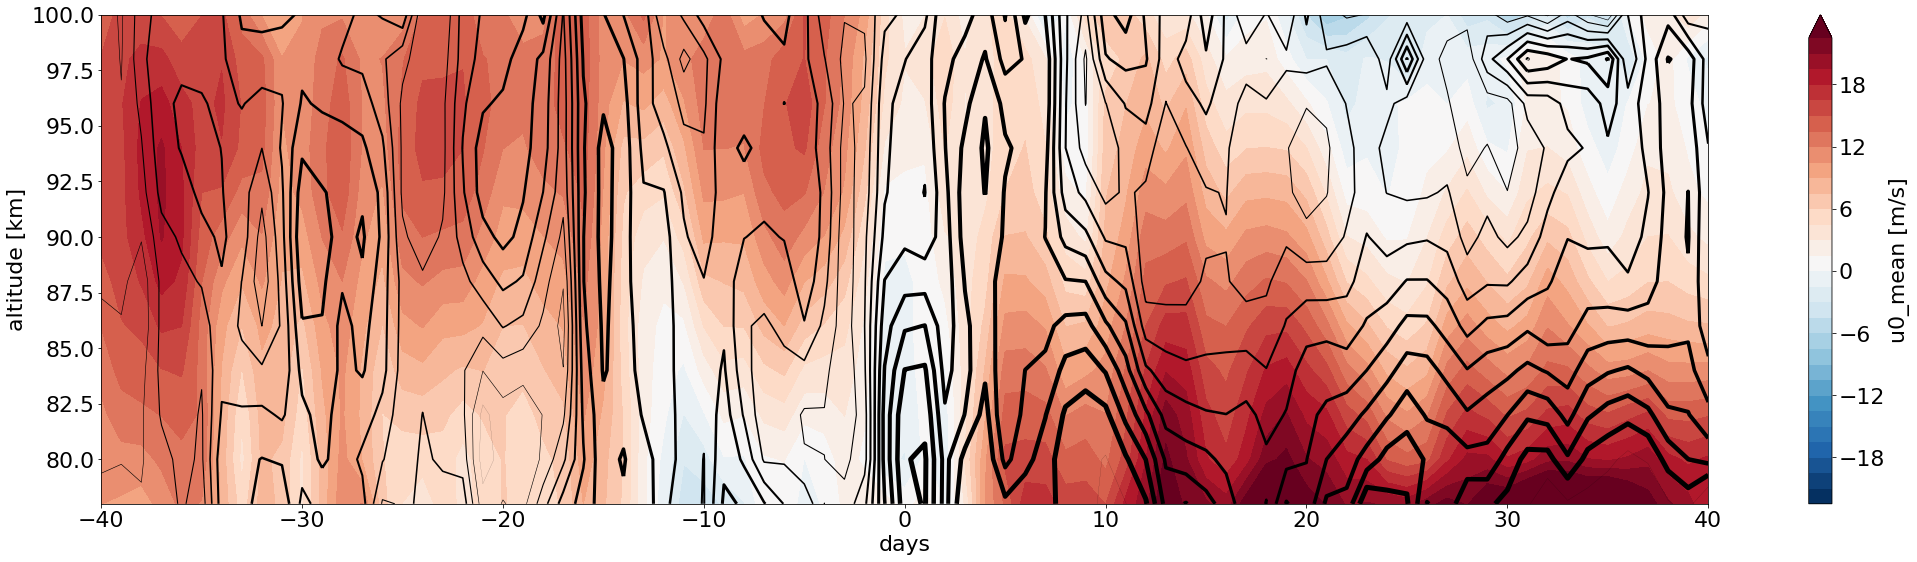

In [5]:
plotting_routine(sea_u, "u0")

#### Anomalies

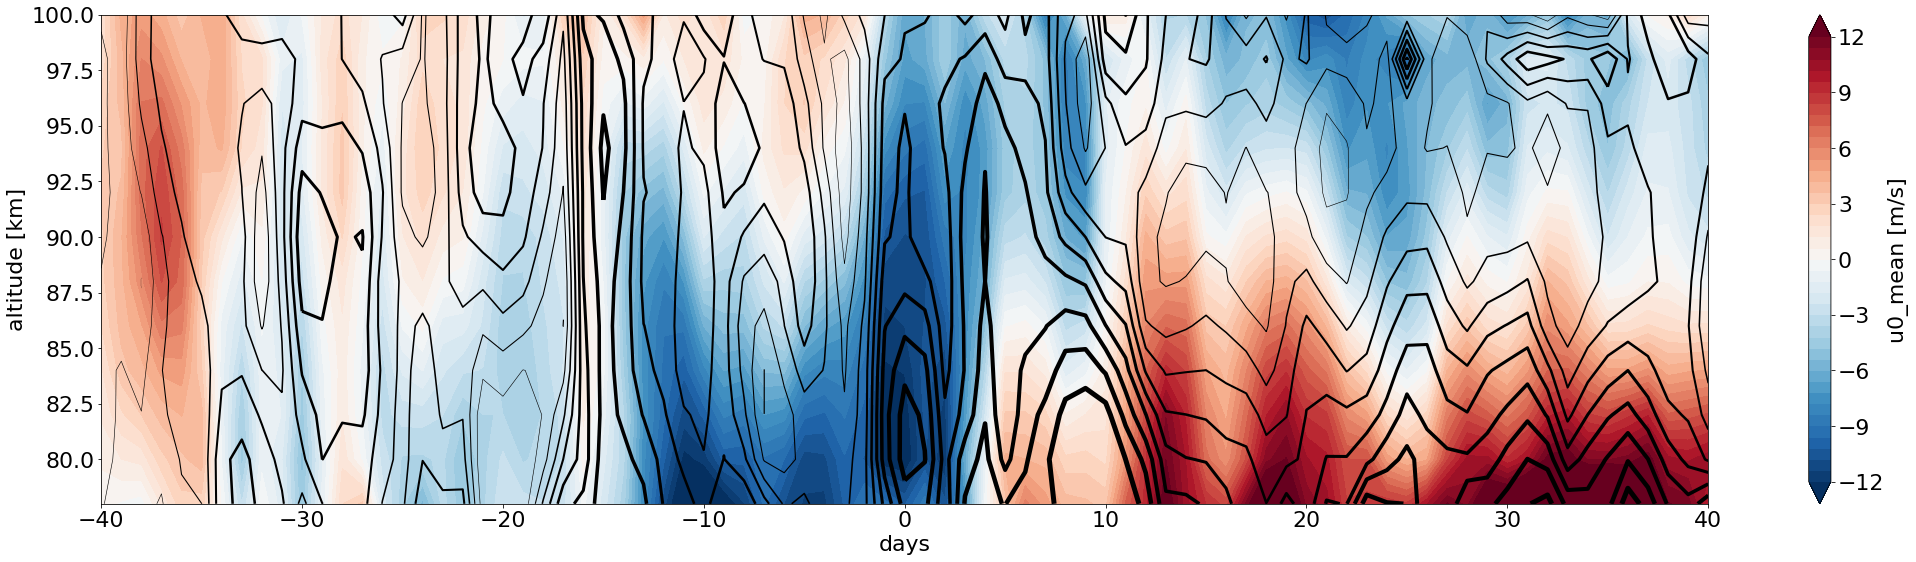

In [6]:
plotting_routine(sea_u_anomalie, "u0")

### Meridional wind component

#### Climatology

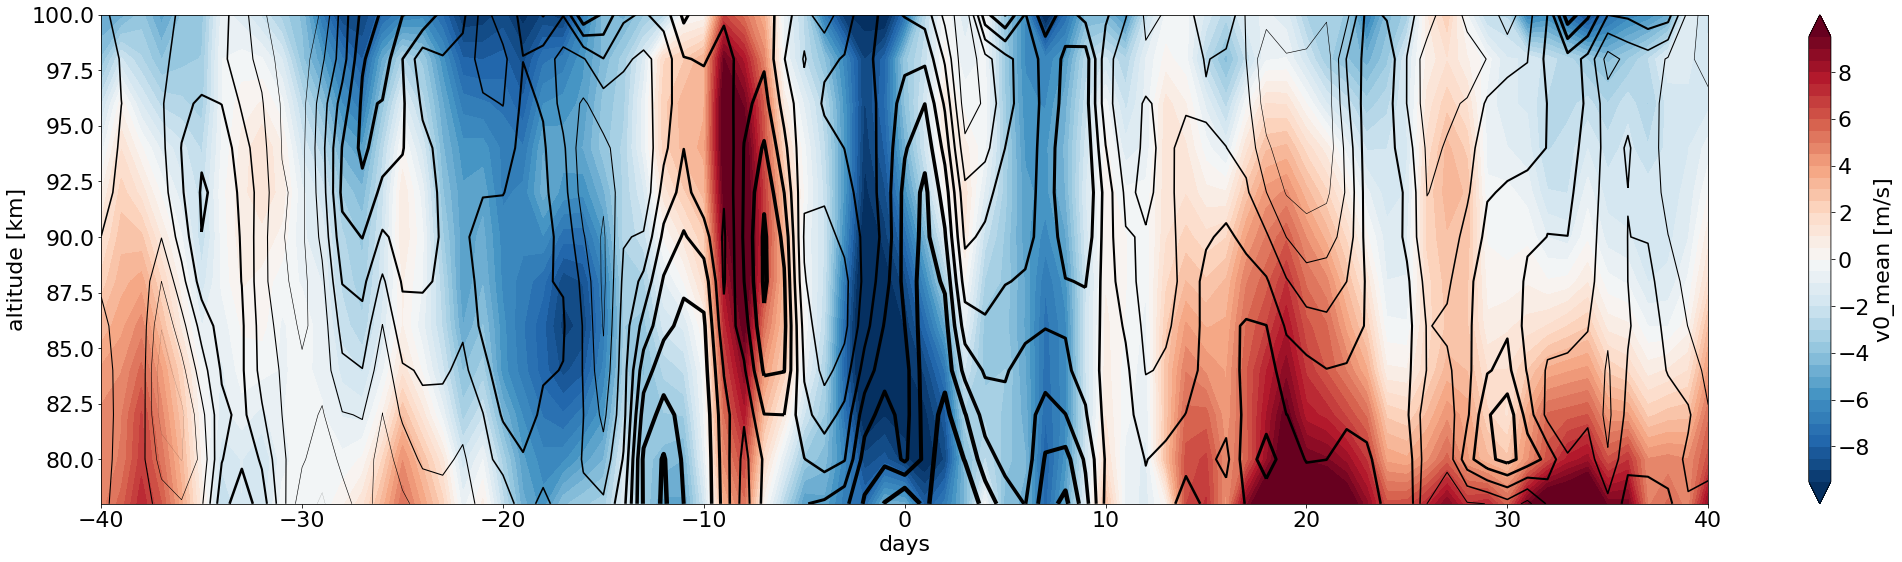

In [7]:
plotting_routine(sea_v, "v0")

#### Anomalies

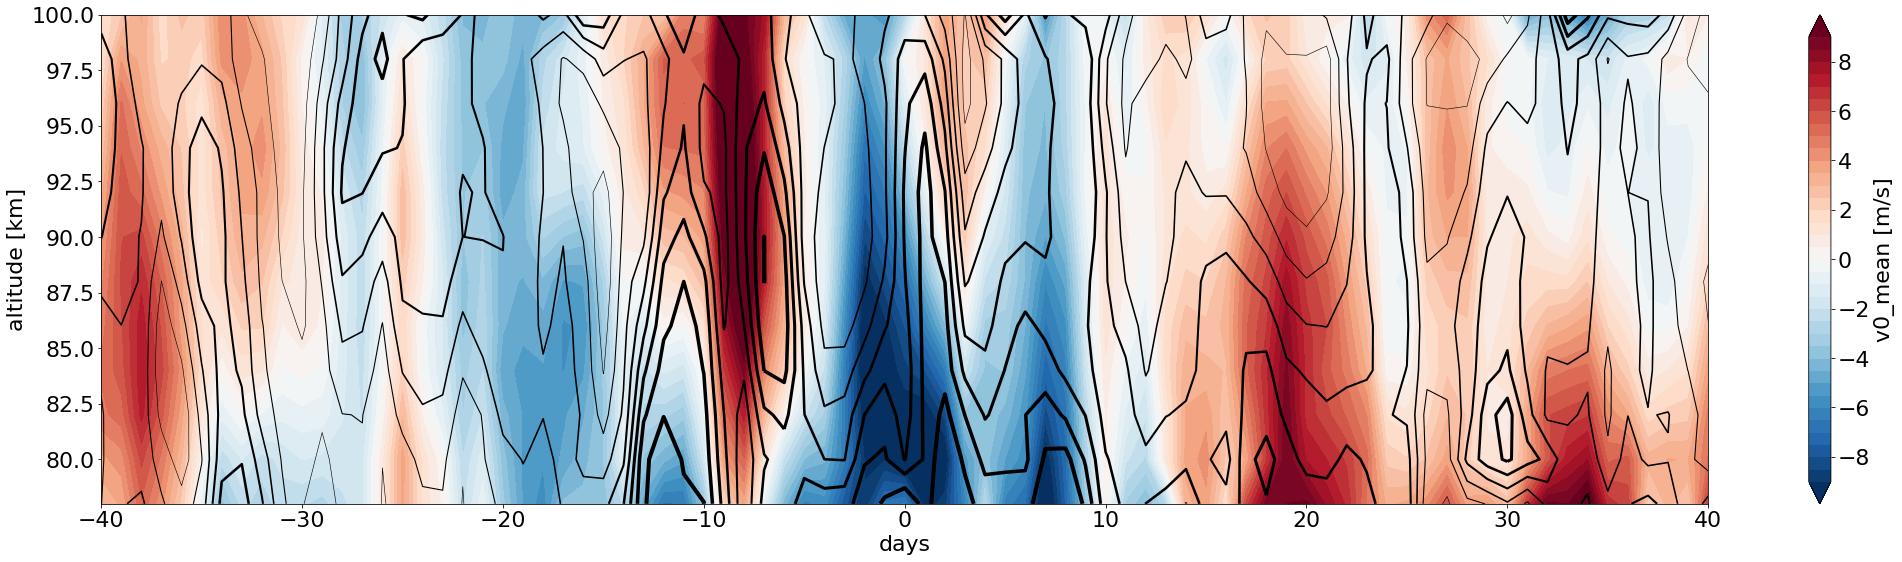

In [8]:
plotting_routine(sea_v_anomalie, "v0")

## Wave estimates

In [9]:
ds_waves = read_group("waves", station, root_path)
gw = read_var(ds_waves, "GW")
pw = read_var(ds_waves, "PW")

gw_anomalie = anomalie("dayofyear", gw)

pw_anomalie = anomalie("dayofyear", pw)

sea_gw = sea_SES_special(40, station, gw)
# sea_gw.name = 'sea_gw'
sea_gw_anomalie = sea_SES_special(40, station, gw_anomalie)
sea_gw_anomalie["name"] = "sea_gw_anomalie"

sea_pw = sea_SES_special(40, station, pw)
# sea_pw.name = 'sea_pw'
sea_pw_anomalie = sea_SES_special(40, station, pw_anomalie)
sea_pw_anomalie["name"] = "sea_pw_anomalie"

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Gravity waves

#### Gravity wave activity

##### Climatology

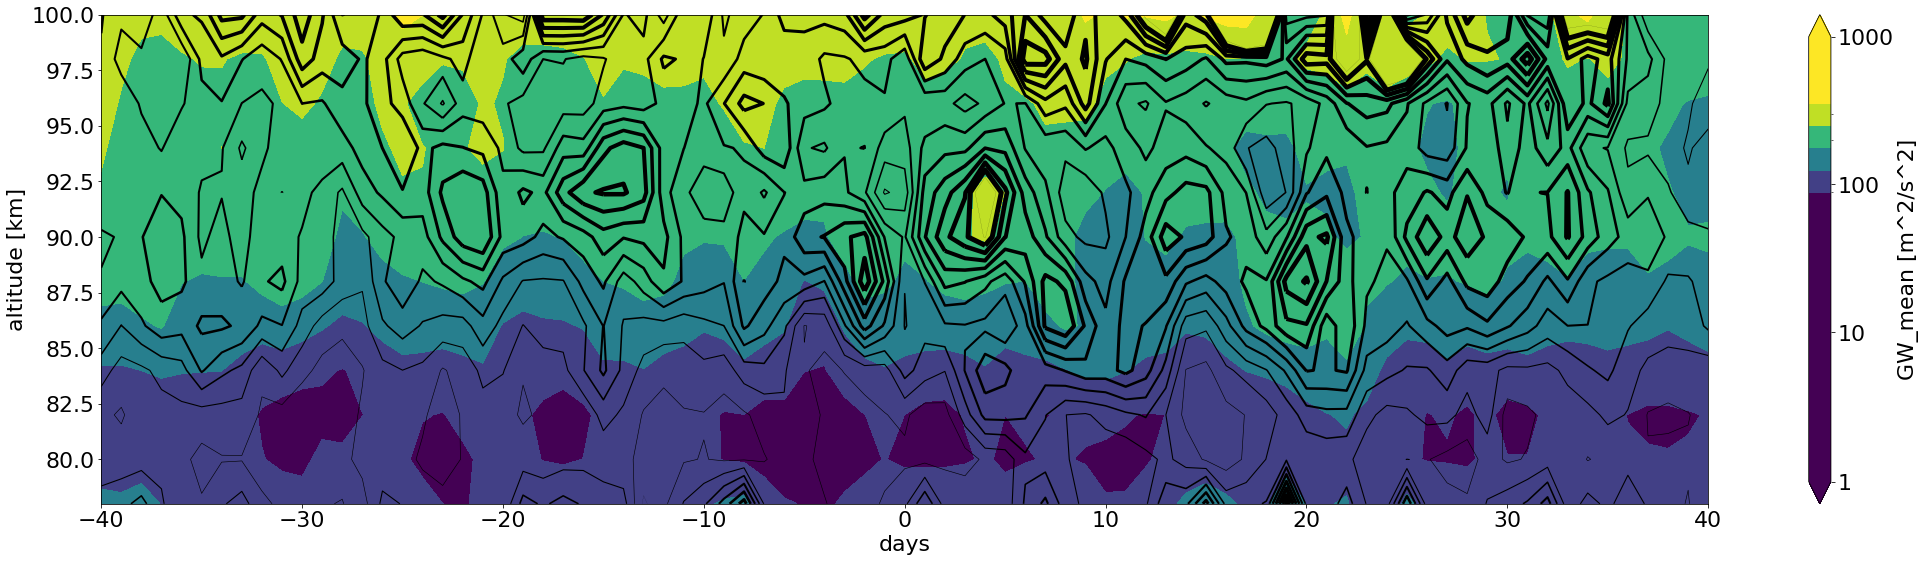

In [10]:
plotting_routine(sea_gw, "GW", True)

##### Anomalies

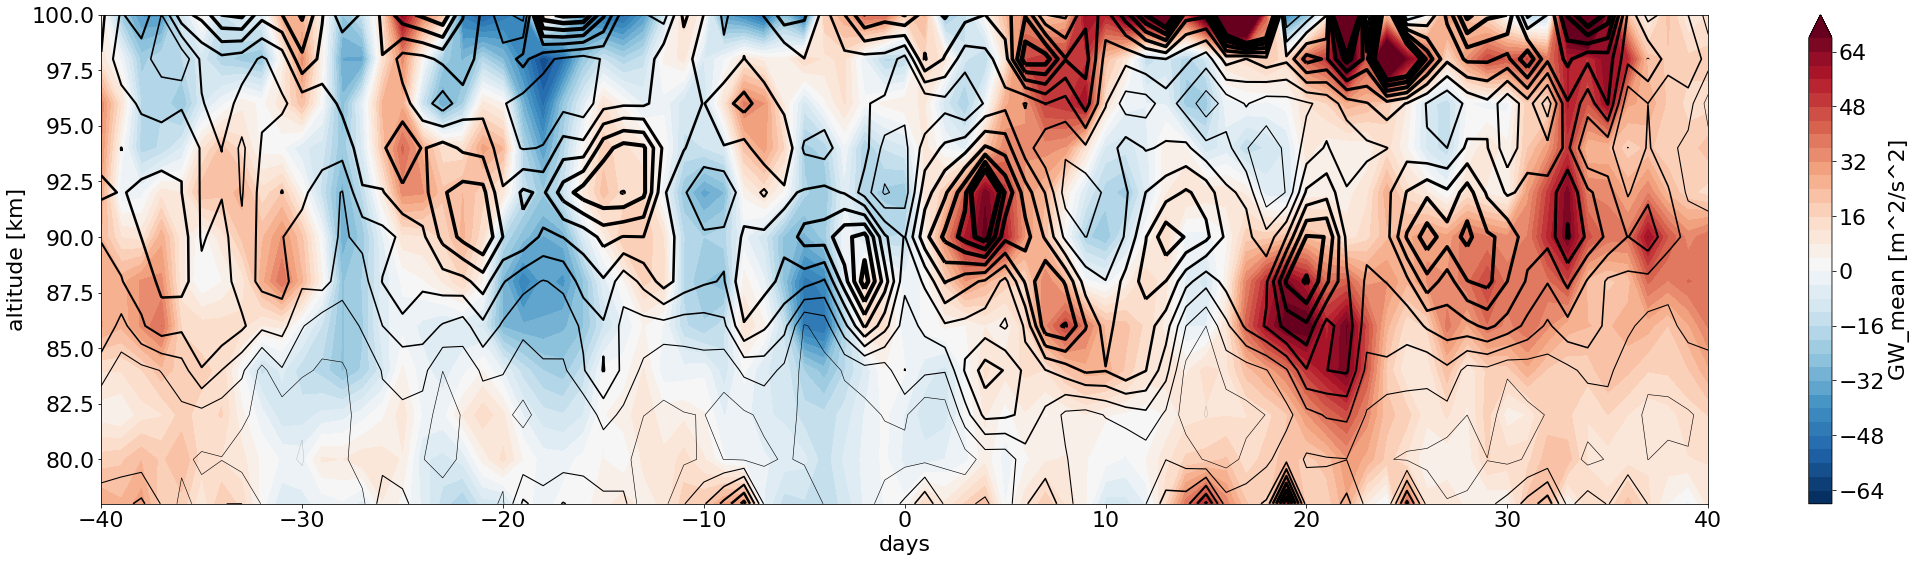

In [11]:
plotting_routine(sea_gw_anomalie, "GW")

#### Gravity wave drag

In [12]:
station_name = station

directory = glob.glob(f"{root_path}GWD*_{station}.nc")[0]

# directory = root_path + 'GWD_1999-08-01_2021-05-01_Sodankya_Esrange.nc'

ds = xr.open_dataset(directory)


gwd = ds["GWD"]

gwd_anomalie = anomalie("dayofyear", gwd)

sea_gwd = sea_SES_special(40, station_name, gwd)
# sea_gwd.name = 'sea_gwd'
sea_gwd_anomalie = sea_SES_special(40, station_name, gwd_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


##### Climatology

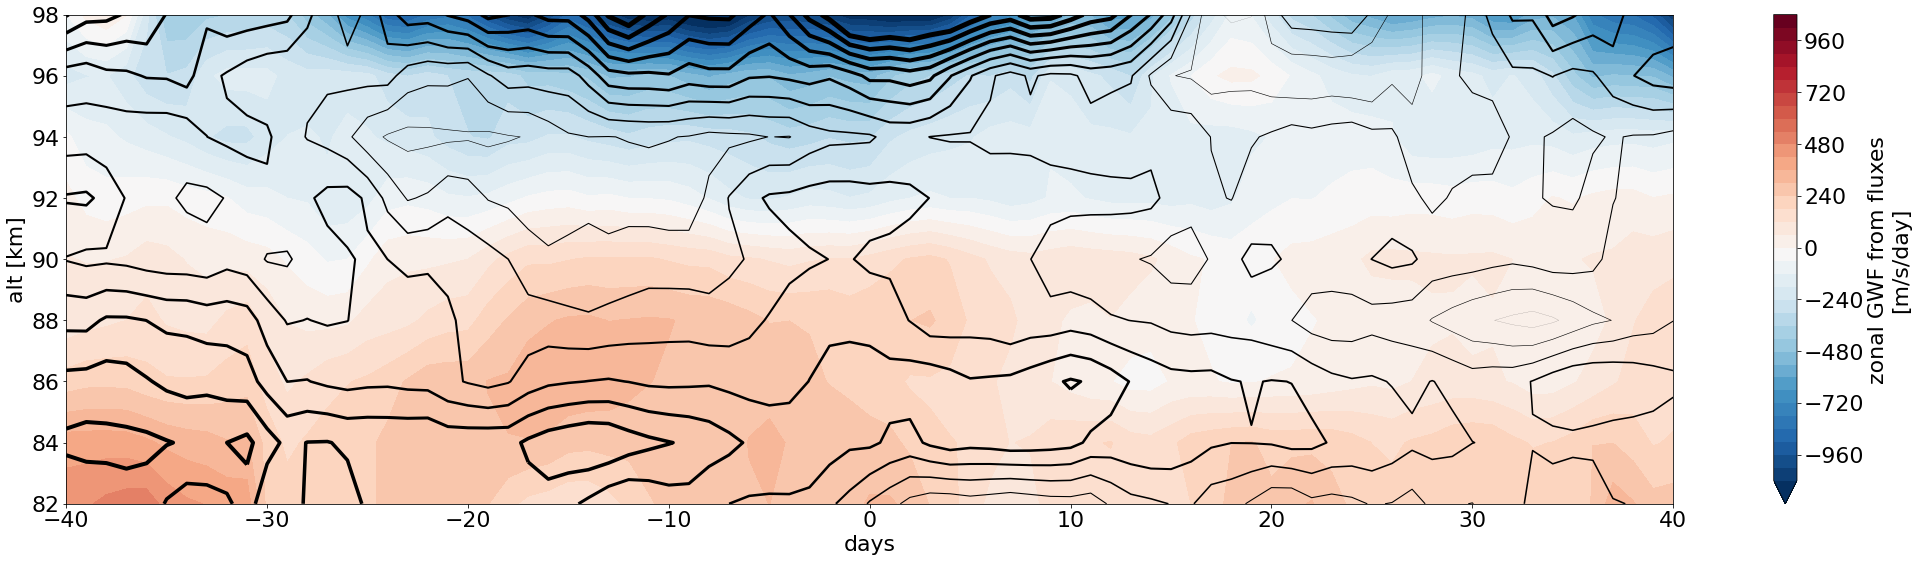

In [13]:
plotting_routine(sea_gwd, "GWD")

##### Anomalies

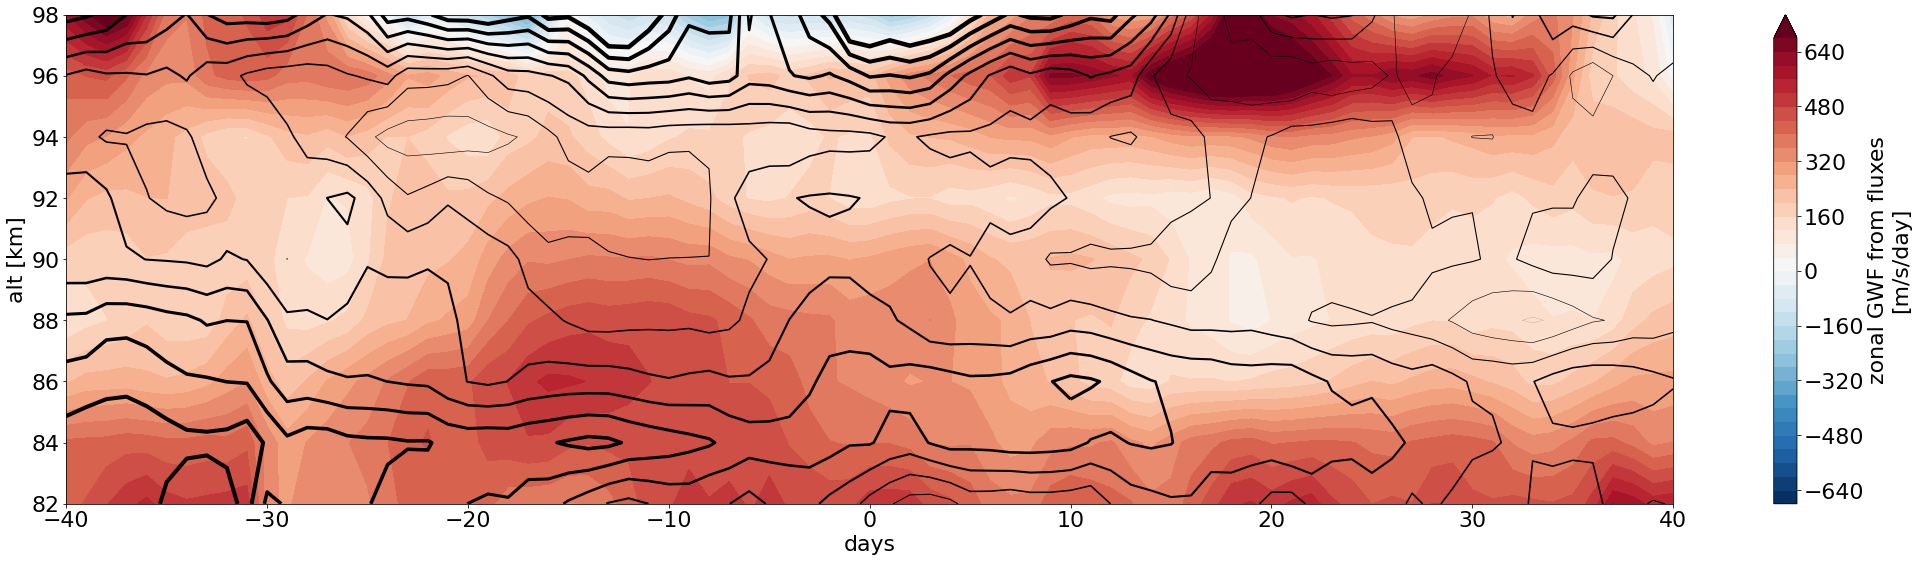

In [14]:
plotting_routine(sea_gwd_anomalie, "GWD")

### Planetary waves

#### Climatology

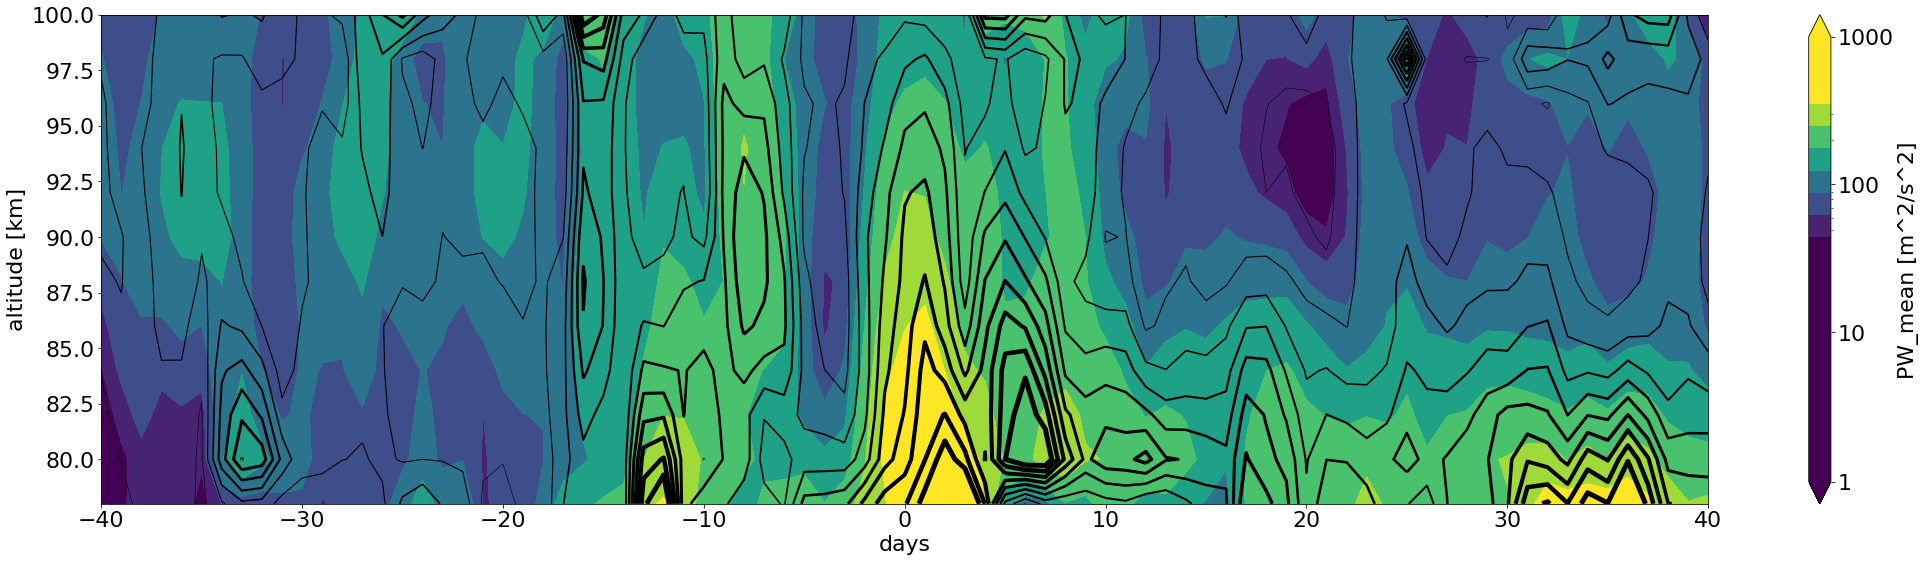

In [15]:
plotting_routine(sea_pw, "PW", True)

#### Anomalies

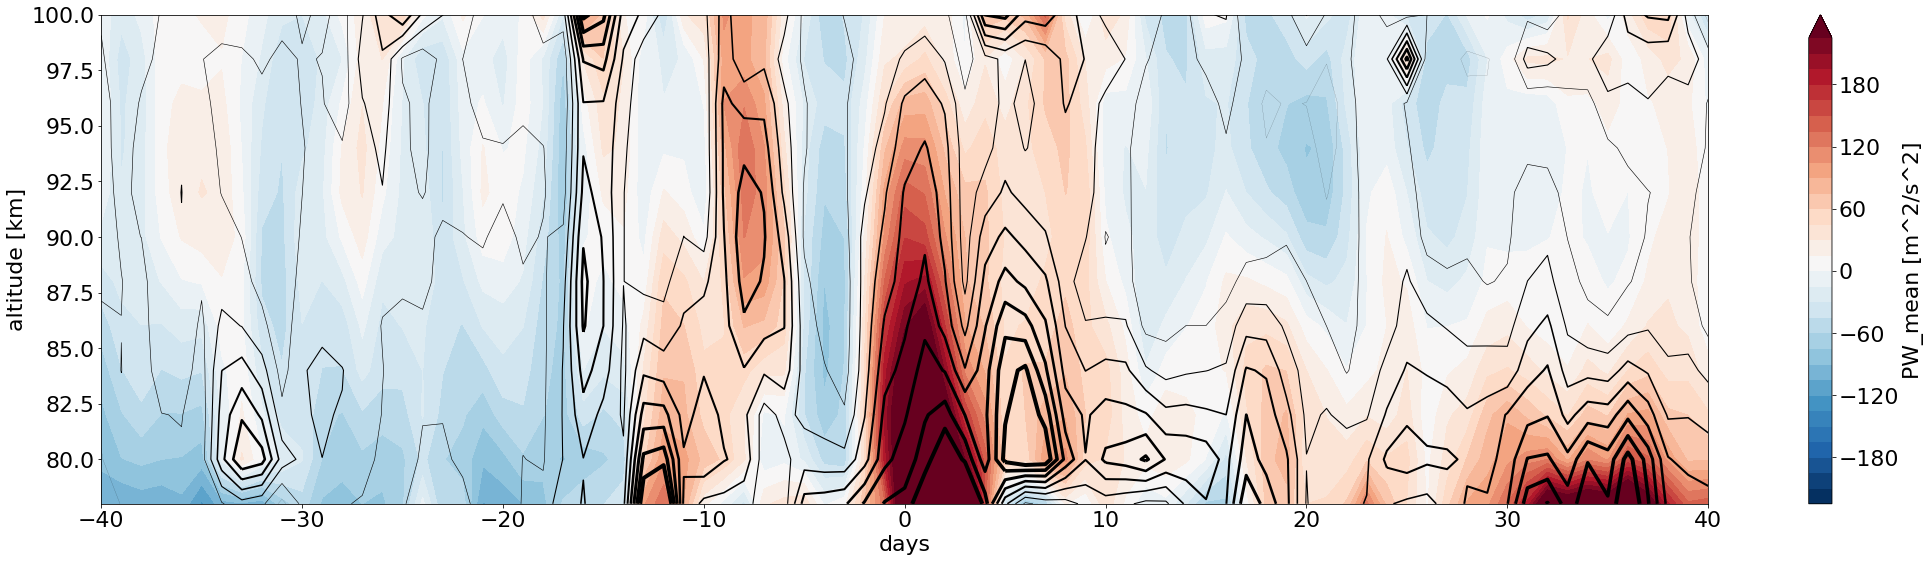

In [16]:
plotting_routine(sea_pw_anomalie, "PW")